In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv("Credit_Card_Applications.csv")

In [5]:
df.head(20)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [7]:
# Check for missing values
df.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [9]:
df.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


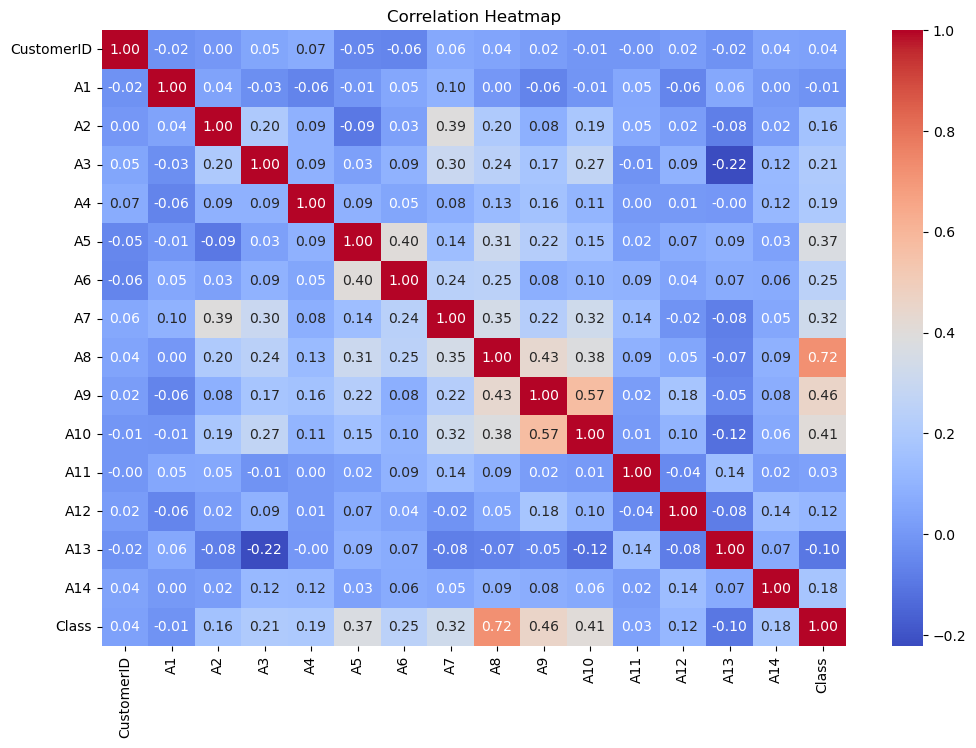

In [11]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

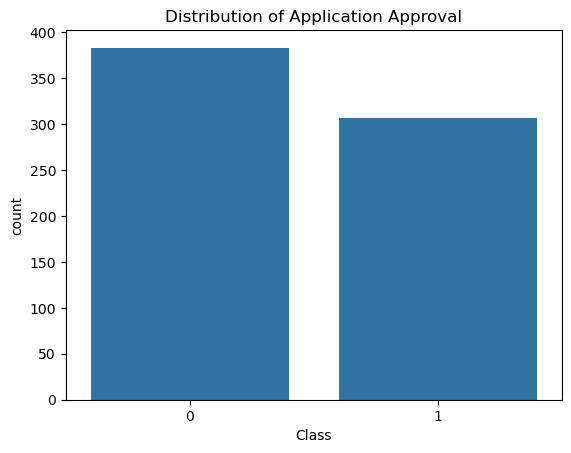

In [13]:
# Distribution of the target variable
sns.countplot(x='Class', data=df)
plt.title('Distribution of Application Approval')
plt.show()

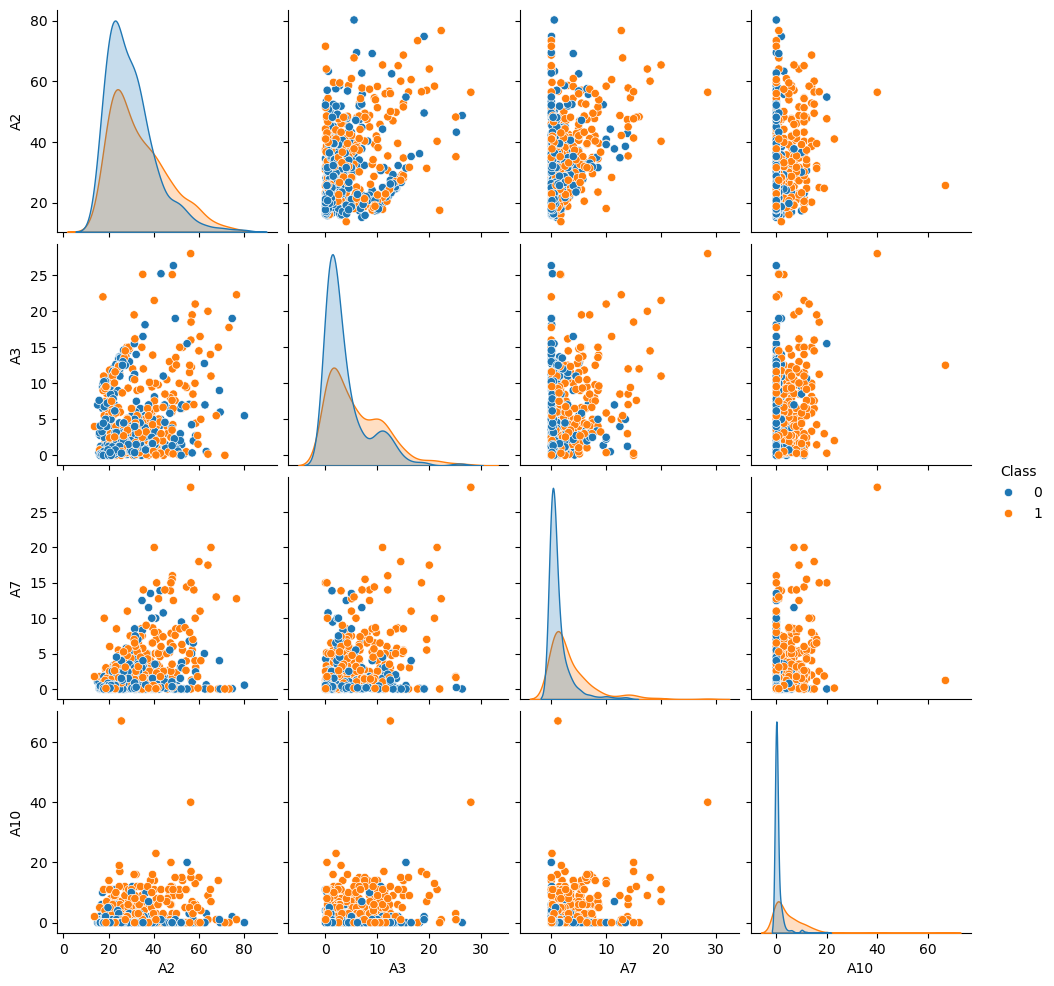

In [17]:
# Pair plot for selected features
sns.pairplot(df, vars=['A2', 'A3', 'A7', 'A10'], hue='Class')
plt.show()

In [19]:
# Define features and target
X = df.drop(['CustomerID', 'Class'], axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

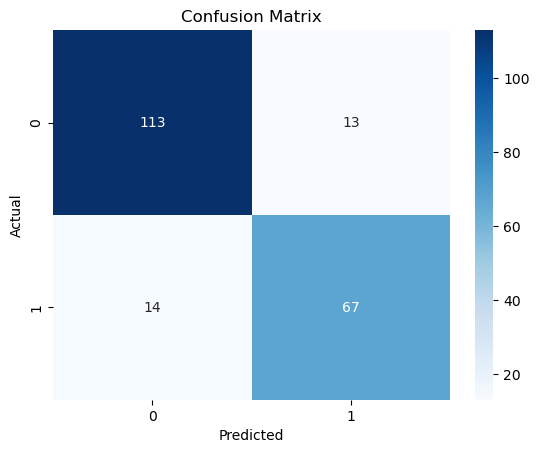

In [23]:
# Predict on the test set
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       126
           1       0.84      0.83      0.83        81

    accuracy                           0.87       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.87      0.87      0.87       207



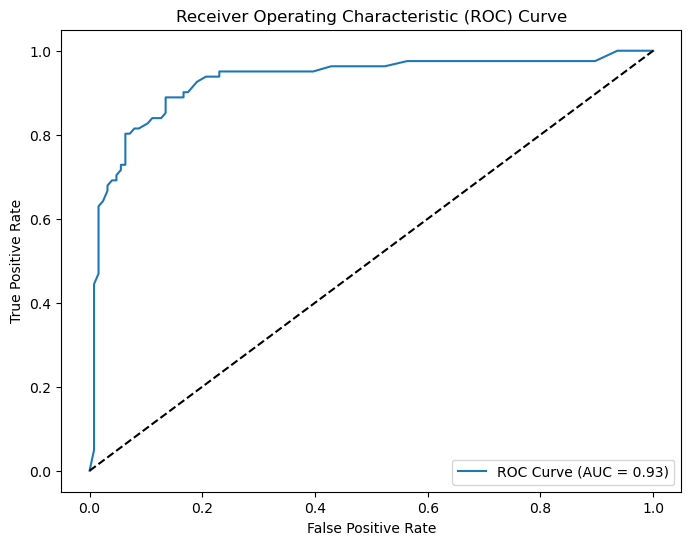

In [27]:
# ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Conclusion and Future Work
In this notebook, we explored a dataset of credit card applications, visualized important features, and built a predictive model using a Random Forest Classifier. The model demonstrated a reasonable performance, but there is always room for improvement. Future work could involve exploring more sophisticated models, feature selection techniques, and hyperparameter tuning to enhance prediction accuracy. If you found this analysis useful, please consider upvoting this notebook.